# Degree Day Analysis


In [31]:
# Import the required libraries and dependencies
import os
from dotenv import load_dotenv
from pathlib import Path
import datetime as dt
import pandas as pd
import hvplot.pandas
import plotly.express as px

import sqlalchemy
import helpful_functions as hf

%matplotlib inline


In [2]:
engine = sqlalchemy.create_engine(hf.db_connection_string)
print(engine)

Engine(sqlite:///Resources/energy_data.db)


## Enable your Mapbox API access token

In [3]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm the availability of your Mapbox API access token by checking its type
if type(mapbox_api_access_token) == type(''):
    # Set your Mapbox API access token
    px.set_mapbox_access_token(mapbox_api_access_token)
    print('Mapbox API loaded.')
else:
    print('Error loading Mapbox API Token. Check your .env file.')

Mapbox API loaded.


## Import ERCOT data

In [4]:
ercot_2020 = pd.read_sql_table(
    'ERCOT_2020', 
    con=engine, 
    index_col='Datetime'
)
display(ercot_2020)
ercot_2020['Settlement Point Price'] = ercot_2020['Settlement Point Price'].replace(',', '', regex=True).astype('float')
display(ercot_2020.dtypes)


,Settlement Point Price
Datetime,
2020-02-01 01:00:00,11.66
2020-02-01 01:15:00,11.85
2020-02-01 01:30:00,11.78
2020-02-01 01:45:00,11.59
2020-02-01 02:00:00,11.42
...,...
2020-02-29 23:45:00,9.64
2020-03-01 00:00:00,9.41
2020-03-01 00:15:00,8.74


Settlement Point Price    float64
dtype: object

In [5]:
ercot_2021 = pd.read_sql_table(
    'ERCOT_2021', 
    con=engine,
    index_col='Datetime'
)
display(ercot_2021)
ercot_2021['Settlement Point Price'] = ercot_2021['Settlement Point Price'].replace(',', '', regex=True).astype('float')
display(ercot_2021.dtypes)


,Settlement Point Price
Datetime,
2021-02-01 01:00:00,19.55
2021-02-01 01:15:00,19.39
2021-02-01 01:30:00,19.05
2021-02-01 01:45:00,18.95
2021-02-01 02:00:00,18.91
...,...
2021-02-28 23:45:00,-15.07
2021-03-01 00:00:00,-17.20
2021-03-01 00:15:00,-22.63


Settlement Point Price    float64
dtype: object

# Import Weather Underground Data

In [19]:
def gen_wu_table_name(year, city):
    table_name = 'WU_' + city + '_' + year
    return table_name

wu_table_list = []
for year in hf.year_list:
    for city in hf.city_list_2:
        wu_table = gen_wu_table_name(year, city)
        wu_table_list.append(wu_table)


# Plot Weather Underground Data

In [47]:
plot_index = 0

In [63]:
title=wu_table_list[plot_index]

wu_df = pd.read_sql_table(wu_table_list[plot_index], con=engine)
plot_index+=1

wu_df.hvplot(
    title=title,
    x='Datetime',
    y='Temperature'
).opts(width=1200, height=500)


:Curve   [Datetime]   (Temperature)

# Plot ERCOT Data

In [62]:
ercot_2020.hvplot(
    kind='line',
    title='Energy Prices - February 2020',
    xlabel='Date',
    color='orange',
    x='Datetime',
    y='Settlement Point Price',
).opts(width=1200, height=500)

:Curve   [Datetime]   (Settlement Point Price)

In [64]:
ercot_2021.hvplot(
    title='Energy Prices - February 2021',
    xlabel='Date',
    color='red',
    x='Datetime',
    y='Settlement Point Price',
).opts(width=1200, height=500)

:Curve   [Datetime]   (Settlement Point Price)

In [67]:
ercot_2020.hvplot(
    kind='line',
    title='Energy Prices - February 2020 vs. 2021',
    xlabel='Date',
    color='orange',
    x='Datetime',
    y='Settlement Point Price',
).opts(width=1200, height=500) * ercot_2021.hvplot(
    xlabel='Date',
    color='red',
    x='Datetime',
    y='Settlement Point Price',
)

:Overlay
   .Curve.I  :Curve   [Datetime]   (Settlement Point Price)
   .Curve.II :Curve   [Datetime]   (Settlement Point Price)

Text(0, 0.5, 'Price')

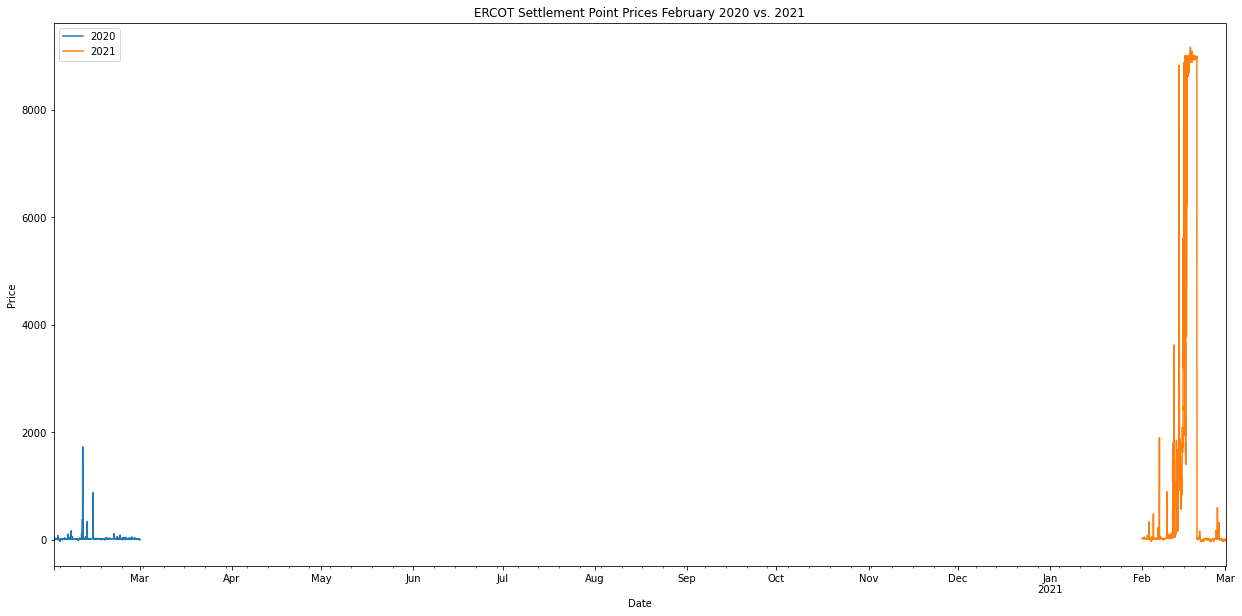

In [10]:
ax = ercot_2020.plot(
    legend=True,
    figsize=(21,10),
    title='ERCOT Settlement Point Prices February 2020 vs. 2021',
    xlabel='Date'
)
ercot_2021.plot(ax=ax)
ax.legend(['2020', '2021'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')